In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Загрузим данные и отделим столбец калорий

In [3]:
data_train = pd.read_excel('./../description/train.xlsx')
data_test = pd.read_excel('./../description/test.xlsx')

In [4]:
Y = data_train['Energ_Kcal']
X = data_train.drop(['Energ_Kcal'], axis=1)
X.head()

,Shrt_Desc,Water_(g),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",4.70,12.00,6.00,3.90,73.40,5.2,13.75,651.0,47.50,...,3.0,1.267,1.429,2.186,0.0,2.0,1 tbsp,15.0,.5 oz,0.0
1,"HEARTS OF PALM,CANNED",90.20,2.52,0.62,2.04,4.62,2.4,NaN,58.0,3.13,...,NaN,0.130,0.103,0.202,0.0,146.0,1 cup,33.0,1 piece,0.0
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...",63.89,24.06,11.09,1.56,0.00,0.0,0.00,13.0,0.97,...,0.0,2.866,4.878,1.673,130.0,89.0,1 thigh,85.0,"1 serving, (3 oz)",29.0
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",54.73,20.43,21.35,3.51,0.00,0.0,0.00,10.0,0.95,...,0.0,7.670,10.140,2.320,58.0,140.0,1 cup,85.0,3 oz,27.0
4,"VINEGAR,DISTILLED",94.78,0.00,0.00,0.02,0.04,0.0,0.04,6.0,0.03,...,0.0,0.000,0.000,0.000,0.0,14.0,1 tbsp,238.0,1 cup,0.0


# Создадим общую таблицу для анализа данных

In [5]:
data = X.append(data_test, ignore_index=True)
data.head()

,Shrt_Desc,Water_(g),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",4.70,12.00,6.00,3.90,73.40,5.2,13.75,651.0,47.50,...,3.0,1.267,1.429,2.186,0.0,2.0,1 tbsp,15.0,.5 oz,0.0
1,"HEARTS OF PALM,CANNED",90.20,2.52,0.62,2.04,4.62,2.4,NaN,58.0,3.13,...,NaN,0.130,0.103,0.202,0.0,146.0,1 cup,33.0,1 piece,0.0
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...",63.89,24.06,11.09,1.56,0.00,0.0,0.00,13.0,0.97,...,0.0,2.866,4.878,1.673,130.0,89.0,1 thigh,85.0,"1 serving, (3 oz)",29.0
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",54.73,20.43,21.35,3.51,0.00,0.0,0.00,10.0,0.95,...,0.0,7.670,10.140,2.320,58.0,140.0,1 cup,85.0,3 oz,27.0
4,"VINEGAR,DISTILLED",94.78,0.00,0.00,0.02,0.04,0.0,0.04,6.0,0.03,...,0.0,0.000,0.000,0.000,0.0,14.0,1 tbsp,238.0,1 cup,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 51 columns):
Shrt_Desc            8618 non-null object
Water_(g)            8612 non-null float64
Protein_(g)          8618 non-null float64
Lipid_Tot_(g)        8618 non-null float64
Ash_(g)              8286 non-null float64
Carbohydrt_(g)       8618 non-null float64
Fiber_TD_(g)         7962 non-null float64
Sugar_Tot_(g)        6679 non-null float64
Calcium_(mg)         8264 non-null float64
Iron_(mg)            8471 non-null float64
Magnesium_(mg)       7936 non-null float64
Phosphorus_(mg)      8046 non-null float64
Potassium_(mg)       8208 non-null float64
Sodium_(mg)          8535 non-null float64
Zinc_(mg)            7917 non-null float64
Copper_mg)           7363 non-null float64
Manganese_(mg)       6478 non-null float64
Selenium_(µg)        6868 non-null float64
Vit_C_(mg)           7826 non-null float64
Thiamin_(mg)         7939 non-null float64
Riboflavin_(mg)      7961 non-null

# Удалим последние 5 столбцов, они на калорийность не влияют

In [7]:
data = data.iloc[:, :-5]

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Water_(g),8612.0,54.163710,30.648283,0.0,30.0875,63.2650,77.6100,100.000
Protein_(g),8618.0,11.523910,10.550590,0.0,2.4700,8.2850,19.9775,88.320
Lipid_Tot_(g),8618.0,10.647024,15.866353,0.0,0.9925,5.2350,13.9000,100.000
Ash_(g),8286.0,1.816169,3.035264,0.0,0.8600,1.2000,2.1400,99.800
Carbohydrt_(g),8618.0,21.819062,27.239000,0.0,0.0400,8.9450,32.9000,100.000
Fiber_TD_(g),7962.0,2.189940,4.447017,0.0,0.0000,0.7000,2.5000,79.000
Sugar_Tot_(g),6679.0,8.464779,14.920260,0.0,0.0000,1.6900,9.0000,99.800
Calcium_(mg),8264.0,76.556026,205.045513,0.0,10.0000,21.0000,67.0000,7364.000
Iron_(mg),8471.0,2.743569,5.765324,0.0,0.5600,1.3800,2.6000,123.600
Magnesium_(mg),7936.0,35.559350,57.565498,0.0,13.0000,21.0000,31.0000,781.000


In [9]:
data.dtypes

Shrt_Desc             object
Water_(g)            float64
Protein_(g)          float64
Lipid_Tot_(g)        float64
Ash_(g)              float64
Carbohydrt_(g)       float64
Fiber_TD_(g)         float64
Sugar_Tot_(g)        float64
Calcium_(mg)         float64
Iron_(mg)            float64
Magnesium_(mg)       float64
Phosphorus_(mg)      float64
Potassium_(mg)       float64
Sodium_(mg)          float64
Zinc_(mg)            float64
Copper_mg)           float64
Manganese_(mg)       float64
Selenium_(µg)        float64
Vit_C_(mg)           float64
Thiamin_(mg)         float64
Riboflavin_(mg)      float64
Niacin_(mg)          float64
Panto_Acid_mg)       float64
Vit_B6_(mg)          float64
Folate_Tot_(µg)      float64
Folic_Acid_(µg)      float64
Food_Folate_(µg)     float64
Folate_DFE_(µg)      float64
Choline_Tot_ (mg)    float64
Vit_B12_(µg)         float64
Vit_A_IU             float64
Vit_A_RAE            float64
Retinol_(µg)         float64
Alpha_Carot_(µg)     float64
Beta_Carot_(µg

# Подсчет числа пустых ячеек в столбцах

In [10]:
data.isnull().sum(axis=0).sort_values(ascending=False).head(10)

Choline_Tot_ (mg)    4084
Vit_K_(µg)           3649
Lut+Zea_ (µg)        3412
Lycopene_(µg)        3390
Beta_Crypt_(µg)      3366
Alpha_Carot_(µg)     3355
Vit_D_µg             3299
Vit_D_IU             3298
Beta_Carot_(µg)      3262
Vit_E_(mg)           3005
dtype: int64

# Посмотрим распределение количества пропущенных значений

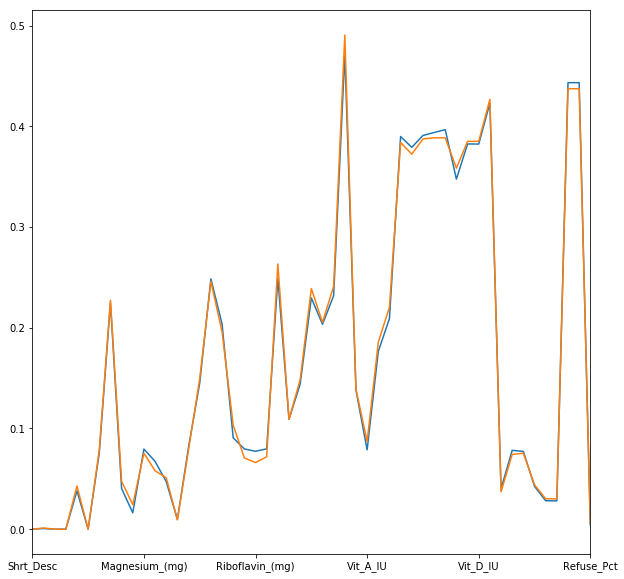

In [11]:
fig = plt.figure(figsize=(10,10))
fig = (X.isnull().sum(axis=0)/X.shape[0]).plot()
fig = (data_test.isnull().sum(axis=0)/data_test.shape[0]).plot()
fig

# Посмотрим число уникальных значений

In [12]:
columns = data.columns.tolist()
unique_analyse = pd.DataFrame(columns=columns[1:], index=['count_unique_values', 'percentage'])
for index in range(1, len(columns)):
    data_column_stat = data[columns[index]].value_counts()
    unique_values = len(data_column_stat)
    most_popular_values = data_column_stat.iloc[0] / data_column_stat.sum()
    unique_analyse[columns[index]] = [unique_values, round(most_popular_values * 100,2)]
unique_analyse.T.sort_values(by='percentage', ascending=False).head(10)

,count_unique_values,percentage
Lycopene_(µg),244.0,93.46
Alpha_Carot_(µg),205.0,85.98
Beta_Crypt_(µg),140.0,85.49
Folic_Acid_(µg),262.0,82.45
Vit_D_µg,116.0,62.25
Lut+Zea_ (µg),512.0,61.20
Beta_Carot_(µg),556.0,57.67
Vit_D_IU,238.0,57.58
Retinol_(µg),443.0,56.02
Vit_C_(mg),564.0,51.38


In [13]:
unique_analyse.T.sort_values(by='count_unique_values').head(10)

,count_unique_values,percentage
Vit_D_µg,116.0,62.25
Beta_Crypt_(µg),140.0,85.49
Alpha_Carot_(µg),205.0,85.98
Vit_D_IU,238.0,57.58
Lycopene_(µg),244.0,93.46
Fiber_TD_(g),253.0,42.90
Folic_Acid_(µg),262.0,82.45
Food_Folate_(µg),264.0,10.88
Magnesium_(mg),309.0,4.30
Cholestrl_(mg),315.0,42.96


In [14]:
low_unique = unique_analyse.T.sort_values(by='percentage', ascending=False).head(10).index

In [15]:
data[low_unique].describe().T

,count,mean,std,min,25%,50%,75%,max
Lycopene_(µg),5228.0,164.700077,1483.062291,0.0,0.0,0.0,0.0,46260.0
Alpha_Carot_(µg),5263.0,32.498195,328.773067,0.0,0.0,0.0,0.0,14251.0
Beta_Crypt_(µg),5252.0,10.801980,158.991451,0.0,0.0,0.0,0.0,6252.0
Folic_Acid_(µg),6631.0,23.816619,116.840881,0.0,0.0,0.0,0.0,2993.0
Vit_D_µg,5319.0,0.578060,3.887389,0.0,0.0,0.0,0.2,250.0
Lut+Zea_ (µg),5206.0,192.577795,1151.024421,0.0,0.0,0.0,28.0,19697.0
Beta_Carot_(µg),5356.0,223.484317,1302.396930,0.0,0.0,0.0,20.0,42891.0
Vit_D_IU,5320.0,23.152820,155.482812,0.0,0.0,0.0,7.0,10000.0
Retinol_(µg),6806.0,92.181898,864.571195,0.0,0.0,0.0,12.0,30000.0
Vit_C_(mg),7826.0,8.727434,60.368668,0.0,0.0,0.0,3.5,2400.0


In [16]:
data[low_unique].nunique()

Lycopene_(µg)       244
Alpha_Carot_(µg)    205
Beta_Crypt_(µg)     140
Folic_Acid_(µg)     262
Vit_D_µg            116
Lut+Zea_ (µg)       512
Beta_Carot_(µg)     556
Vit_D_IU            238
Retinol_(µg)        443
Vit_C_(mg)          564
dtype: int64

# Посмотрим схожие данные

In [17]:
x = data[['Vit_D_µg', 'Vit_D_IU']]
x.corr()

,Vit_D_µg,Vit_D_IU
Vit_D_µg,1.000000,0.999987
Vit_D_IU,0.999987,1.000000


In [18]:
x = data[['Vit_A_RAE', 'Vit_A_IU', 'Retinol_(µg)']]
x.corr()

,Vit_A_RAE,Vit_A_IU,Retinol_(µg)
Vit_A_RAE,1.000000,0.845111,0.989198
Vit_A_IU,0.845111,1.000000,0.762014
Retinol_(µg),0.989198,0.762014,1.000000


In [19]:
c = data.corr().abs()
k = 0
max_corr = pd.DataFrame(columns=[1,2,3])
for i in c.columns:
    for j in c.columns:
        if i != j:
            max_corr.loc[k] = [i, j, c[i][j]]
            k += 1

In [20]:
max_corr.sort_values(by=3).tail(15)

,1,2,3
143,Ash_(g),Sodium_(mg),0.824816
1349,Vit_A_RAE,Vit_A_IU,0.845111
1305,Vit_A_IU,Vit_A_RAE,0.845111
1079,Folic_Acid_(µg),Folate_Tot_(µg),0.879410
1035,Folate_Tot_(µg),Folic_Acid_(µg),0.879410
1850,FA_Mono_(g),Lipid_Tot_(g),0.885998
129,Lipid_Tot_(g),FA_Mono_(g),0.885998
1081,Folic_Acid_(µg),Folate_DFE_(µg),0.952167
1168,Folate_DFE_(µg),Folic_Acid_(µg),0.952167
1167,Folate_DFE_(µg),Folate_Tot_(µg),0.982819


In [21]:
x = data[['Folate_Tot_(µg)', 'Folate_DFE_(µg)', 'Folic_Acid_(µg)']]
x.corr()

,Folate_Tot_(µg),Folate_DFE_(µg),Folic_Acid_(µg)
Folate_Tot_(µg),1.000000,0.982819,0.879410
Folate_DFE_(µg),0.982819,1.000000,0.952167
Folic_Acid_(µg),0.879410,0.952167,1.000000


In [22]:
data = data.drop('Folate_DFE_(µg)', axis=1)
data = data.drop('Vit_D_IU', axis=1)
data = data.drop('Vit_A_RAE', axis=1)
data.head()

,Shrt_Desc,Water_(g),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg)
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",4.70,12.00,6.00,3.90,73.40,5.2,13.75,651.0,47.50,...,0.0,0.0,157.0,5.00,0.0,3.0,1.267,1.429,2.186,0.0
1,"HEARTS OF PALM,CANNED",90.20,2.52,0.62,2.04,4.62,2.4,NaN,58.0,3.13,...,NaN,NaN,NaN,NaN,0.0,NaN,0.130,0.103,0.202,0.0
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...",63.89,24.06,11.09,1.56,0.00,0.0,0.00,13.0,0.97,...,0.0,0.0,0.0,0.25,NaN,0.0,2.866,4.878,1.673,130.0
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",54.73,20.43,21.35,3.51,0.00,0.0,0.00,10.0,0.95,...,0.0,0.0,0.0,0.24,0.7,0.0,7.670,10.140,2.320,58.0
4,"VINEGAR,DISTILLED",94.78,0.00,0.00,0.02,0.04,0.0,0.04,6.0,0.03,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.000,0.000,0.0


# Посмотрим теперь корреляцию на тренировочных данных относительно целевой переменной

In [23]:
correlation = data_train.corr()['Energ_Kcal'].sort_values()
print('Наивысшая позитивная корреляция: \n', correlation.tail(15))
print('\nНаивысшая негативная корреляция: \n', correlation.head(15))

Наивысшая позитивная корреляция: 
 Folate_DFE_(µg)    0.172081
Thiamin_(mg)       0.176550
Phosphorus_(mg)    0.182193
Folate_Tot_(µg)    0.183073
Fiber_TD_(g)       0.195570
Iron_(mg)          0.197149
Magnesium_(mg)     0.255336
Sugar_Tot_(g)      0.350955
Vit_E_(mg)         0.374964
Carbohydrt_(g)     0.483376
FA_Poly_(g)        0.611080
FA_Sat_(g)         0.625742
FA_Mono_(g)        0.694226
Lipid_Tot_(g)      0.809028
Energ_Kcal         1.000000
Name: Energ_Kcal, dtype: float64

Наивысшая негативная корреляция: 
 Water_(g)          -0.898171
GmWt_1             -0.403398
Lut+Zea_ (µg)      -0.117167
GmWt_2             -0.105206
Beta_Carot_(µg)    -0.103728
Refuse_Pct         -0.085480
Lycopene_(µg)      -0.074288
Alpha_Carot_(µg)   -0.059196
Vit_K_(µg)         -0.029450
Vit_C_(mg)         -0.025274
Beta_Crypt_(µg)    -0.024588
Vit_A_IU           -0.022399
Vit_B12_(µg)       -0.005924
Cholestrl_(mg)      0.019095
Vit_A_RAE           0.035337
Name: Energ_Kcal, dtype: float64


### Таким образом мы видим как различные столбцы влияют на целевую переменную. Проанализируем полиномиальные свойства основных корреляционных величин.

In [24]:
poly_target = Y
col = ['Lipid_Tot_(g)', 'FA_Mono_(g)', 'FA_Sat_(g)', 'FA_Poly_(g)', 'Carbohydrt_(g)', 'Water_(g)']
poly_features = data[col]
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
poly_features = imputer.fit_transform(poly_features)
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=3)
poly_transformer.fit(poly_features)
poly_features = poly_transformer.transform(poly_features)
#print(poly_transformer.get_feature_names())
poly_transformer.get_feature_names(input_features = col)[:15]
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(col))
poly_features['Energ_Kcal'] = poly_target
corr = poly_features.corr()['Energ_Kcal'].sort_values()
print(corr.head(10))
print(corr.tail(10))

Water_(g)                    -0.897195
Water_(g)^2                  -0.881036
Water_(g)^3                  -0.836397
Carbohydrt_(g) Water_(g)^2   -0.468144
Carbohydrt_(g) Water_(g)     -0.234835
FA_Poly_(g) Water_(g)^2      -0.068240
FA_Mono_(g) Water_(g)^2      -0.045455
FA_Sat_(g) Water_(g)^2       -0.020151
Lipid_Tot_(g) Water_(g)^2     0.008566
FA_Poly_(g) Water_(g)         0.105731
Name: Energ_Kcal, dtype: float64
Lipid_Tot_(g) FA_Mono_(g)       0.575547
Lipid_Tot_(g)^3                 0.578063
FA_Poly_(g)                     0.594841
Lipid_Tot_(g) Carbohydrt_(g)    0.603304
FA_Sat_(g)                      0.617355
Lipid_Tot_(g)^2                 0.663735
FA_Mono_(g)                     0.674136
Lipid_Tot_(g)                   0.809028
Energ_Kcal                      1.000000
1                                    NaN
Name: Energ_Kcal, dtype: float64


/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


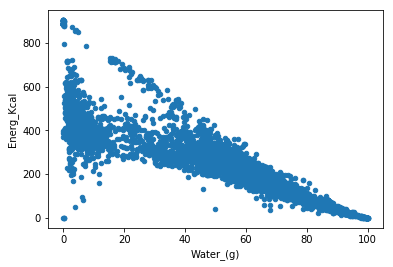

In [25]:
data_train.plot.scatter(x='Water_(g)', y='Energ_Kcal')

In [26]:
far_values = data_train.fillna(0).iloc[:, :-6]
far_values['check'] = far_values['Water_(g)'] + tr['Energ_Kcal']
far_values.sort_values(by='check', ascending=False).tail(4)

NameError: name 'tr' is not defined

In [27]:
indx = far_values.sort_values(by='check', ascending=False).tail(4).index
for i in indx:
    print(far_values.loc[i]['check'])
    for j in tr.columns:
        if far_values.loc[i][j] != 0:
            print(j)

KeyError: 'check'

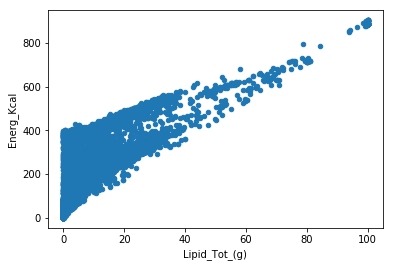

In [28]:
data_train.plot.scatter(x='Lipid_Tot_(g)', y='Energ_Kcal')

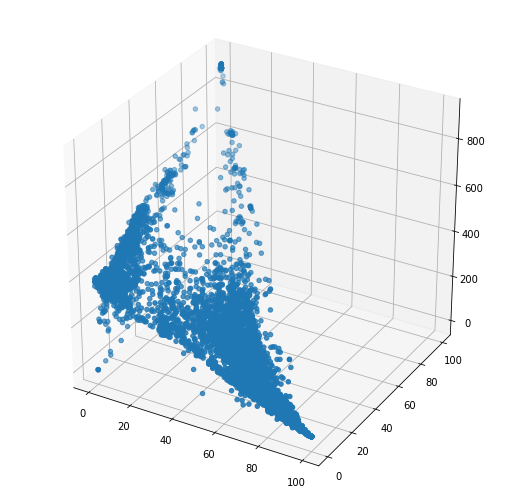

In [30]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_train['Water_(g)'], data_train['Lipid_Tot_(g)'], data_train['Energ_Kcal'])

# Переведем все в граммы  

In [31]:
data['Vit_A(g)'] = data['Vit_A_IU'] * 0.3 / 100000
data = data.drop('Vit_A_IU', axis=1)

In [32]:
columns_gr = data.columns
for i in columns_gr:
    if i.find('µg') != -1:
        new_col = i.replace('µg', 'g')
        data[new_col] = X[i] / 100000
        data = data.drop(i, axis=1)
    if i.find('mg') != -1:
        new_col = i.replace('mg', 'g')
        data[new_col] = data[i] / 1000
        data = data.drop(i, axis=1)
data.columns

Index(['Shrt_Desc', 'Water_(g)', 'Protein_(g)', 'Lipid_Tot_(g)', 'Ash_(g)',
       'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)', 'FA_Sat_(g)',
       'FA_Mono_(g)', 'FA_Poly_(g)', 'Vit_A(g)', 'Calcium_(g)', 'Iron_(g)',
       'Magnesium_(g)', 'Phosphorus_(g)', 'Potassium_(g)', 'Sodium_(g)',
       'Zinc_(g)', 'Copper_g)', 'Manganese_(g)', 'Selenium_(g)', 'Vit_C_(g)',
       'Thiamin_(g)', 'Riboflavin_(g)', 'Niacin_(g)', 'Panto_Acid_g)',
       'Vit_B6_(g)', 'Folate_Tot_(g)', 'Folic_Acid_(g)', 'Food_Folate_(g)',
       'Choline_Tot_ (g)', 'Vit_B12_(g)', 'Retinol_(g)', 'Alpha_Carot_(g)',
       'Beta_Carot_(g)', 'Beta_Crypt_(g)', 'Lycopene_(g)', 'Lut+Zea_ (g)',
       'Vit_E_(g)', 'Vit_D_g', 'Vit_K_(g)', 'Cholestrl_(g)'],
      dtype='object')

Проверим, что мы ничего не потеряли

In [33]:
Y.shape

(7756,)

In [34]:
data_test.shape

(862, 51)

In [35]:
data.shape

(8618, 43)

In [107]:
out = data.loc[:Y.shape[0]-1]
out = out.join(Y)
out.to_csv('main_train.csv', index=False)

In [108]:
out = data.loc[Y.shape[0]:]
out.to_csv('main_test.csv', index=False)